## Unsupervised Learning_R5_Casestudy2_Vehicle

######  Case Study-2
The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Dataset: vehicle
Steps to follow:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [1]:
# Import library
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy.stats import zscore

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Data Load - Case Study 2
df_vehicles = pd.read_csv('vehicle.csv')
df_vehicles.head(6)
df_vehicles.tail(1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


In [3]:
# Data type of vehicles dataframe
df_vehicles.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [4]:
# Unique values of dependent variable
df_vehicles['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [5]:
# Data distribution for each class
print('Van: ',len(df_vehicles[(df_vehicles['class'] == 'van')]))
print('Car: ',len(df_vehicles[(df_vehicles['class'] == 'car')]))
print('Bus: ',len(df_vehicles[(df_vehicles['class'] == 'bus')]))

Van:  199
Car:  429
Bus:  218


In [6]:
df_vehicles.shape

(846, 19)

In [7]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Row count of 846 seen. But most of the columns have total values less than 846 denoting missing values. Let us handle them

Plan is to replace the NaN data point in particular column for a particular class with the median value of the column for that class

In [8]:
if(df_vehicles.isna().values.any() == True):
    df_misses = df_vehicles[df_vehicles.isna().values]
    print('Missing Values')
    print(len(df_misses))
    df_misses
else:
    print('No missing values')

Missing Values
41


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car


In [9]:
# Finding the median values for all columns of each class of vehicles
df_vehicles_median = df_vehicles.groupby(by='class').median()
df_vehicles_median

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,89,44.0,72.0,167.5,64.0,6,152.0,44.0,19.0,145,177.0,344.0,176.0,76.0,5.0,10.0,186.0,189
car,97,46.0,94.0,186.0,61.0,9,185.0,36.0,22.0,150,206.0,512.0,182.0,70.0,6.0,14.0,189.0,198
van,90,42.0,75.0,144.0,59.0,9,142.0,47.0,18.0,145,164.0,300.0,159.0,72.0,6.0,9.0,188.0,196


In [10]:
sdf = pd.DataFrame()
tdf = pd.DataFrame()

def customFillNa(sdf,tdf,col):
    collist = tdf.columns
    count = sdf.shape[0]
    for column in collist:
        for loop in range(0,count):
            if(np.isnan(sdf.loc[loop,column]) == True):
                vclass = sdf.loc[loop,col]
                sdf.loc[loop,column] = tdf.loc[vclass,column]
    return sdf

In [11]:
df_vehicles_nona = customFillNa(df_vehicles,df_vehicles_median,'class')
if(df_vehicles_nona.isna().values.any() == True):
    df_misses = df_vehicles_nona[df_vehicles_nona.isna().values]
    print('Missing Values')
    print(len(df_misses))
    df_misses
else:
    print('No missing values')

No missing values


In [12]:
df_vehicles_nona.head(6)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus


In [13]:
df_vehicles_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [14]:
df_vehicles_nona.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [15]:
df_vehicleclass = df_vehicles_nona['class']
df_vehicles_nona.drop(columns=['class'],inplace=True)

In [16]:
# Lets do a logarithimic scaling of data to get a clearer view in boxplot
column = df_vehicles_nona.columns
df_vehicles_scaled = pd.DataFrame(preprocessing.scale(df_vehicles_nona))
df_vehicles_scaled.columns = column

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


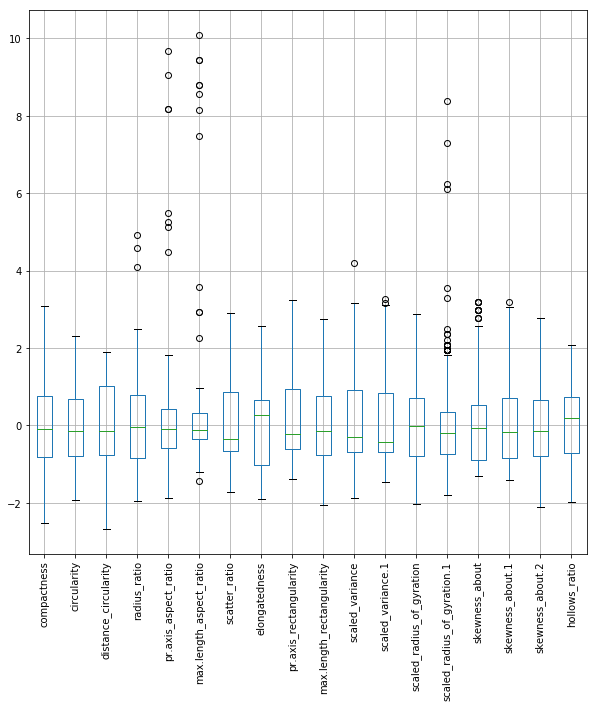

In [17]:
# Box plot of scaled data
df_vehicles_scaled.boxplot(figsize=(10,10),rot=90);
#df_zscore.boxplot(figsize=(10,10),rot=90)

    There are outliers to be handled in columns
    1) max.length_aspect_ratio
    2) pr.axis_aspect_ratio
    3) radius_ratio
    4) scaled_variance.1
    5) scaled_variance
    6) scaled_radius_of_gyration.1
    7) stewness_about
    8) stewness_about.1
    
Let us calculate the z score of individual datapoints to identify the outliers

In [18]:
# Function to detect an outlier
#outliers=[]
#def detect_outliers(data):
#    threshold = 3
#    mean = np.mean(data)
#    std = np.std(data)
    
#    for val in data:
#        zscore = (val - mean) / std
#        if np.abs(zscore) > threshold:
#            outliers.append(val)
#    return outliers

In [19]:
# Measure Z Score
df_zscore = df_vehicles_nona.apply(zscore)
df_zscore.shape

(846, 18)

In [20]:
# Create a copy of the datastore
df_vehicles_final = df_vehicles_nona.copy()
df_vehicles_final['class'] = df_vehicleclass
df_vehicles_final.shape

(846, 19)

In [21]:
# Remove all data points that has zscore value more than 3
cols = df_zscore.columns
index = []
for col in cols:
    index = index + (df_zscore[col][df_zscore[col] > 3].index.tolist())
    #print(col)
    #df_zscore[col][df_zscore[col] > 3]
    
df_vehicles_final = df_vehicles_final.drop(set(index))

In [22]:
df_vehicles_final.shape
df_vehicleclass = df_vehicles_final['class']
df_vehicles_final.drop('class',axis=1,inplace=True)
df_vehicles_final.shape

(824, 19)

(824, 18)

In [23]:
df_vehicles_finalz = df_vehicles_final.apply(zscore)
df_vehicles_finalz.shape

(824, 18)

In [24]:
# Correlation matrix of the final dataset
corr=df_vehicles_finalz.corr()
# Displaying only the upper traingle of correlation matrix
ut = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
ut

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,NaN,0.682043,0.786981,0.751402,0.217209,0.463299,0.807166,-0.784158,0.809390,0.673168,0.787538,0.814385,0.573854,-0.291701,0.221174,0.160389,0.319197,0.396095
circularity,NaN,NaN,0.790275,0.649938,0.220711,0.540710,0.848148,-0.819578,0.847766,0.963819,0.808318,0.842605,0.929224,0.029944,0.144502,-0.012833,-0.090591,0.069785
distance_circularity,NaN,NaN,NaN,0.815384,0.261743,0.627772,0.904721,-0.909416,0.896483,0.770214,0.886694,0.892442,0.699727,-0.284272,0.106099,0.270142,0.162496,0.359678
radius_ratio,NaN,NaN,NaN,NaN,0.671555,0.443681,0.798570,-0.849879,0.774930,0.585694,0.807174,0.791465,0.559190,-0.428902,0.054094,0.189264,0.435804,0.523928
pr.axis_aspect_ratio,NaN,NaN,NaN,NaN,NaN,0.164292,0.223970,-0.321585,0.193875,0.163049,0.246433,0.213782,0.175465,-0.318372,-0.051667,-0.025530,0.402898,0.413679
max.length_aspect_ratio,NaN,NaN,NaN,NaN,NaN,NaN,0.481743,-0.484866,0.481491,0.618196,0.413228,0.449140,0.400295,-0.300852,0.079901,0.140544,0.049848,0.359678
scatter_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.970267,0.989060,0.807172,0.975918,0.993728,0.789990,-0.046097,0.066194,0.216339,0.027467,0.154998
elongatedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.951332,-0.771444,-0.967870,-0.958766,-0.759719,0.129835,-0.045232,-0.188538,-0.132696,-0.244542
pr.axis_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813461,0.964457,0.991024,0.789313,-0.029056,0.075082,0.217178,0.002483,0.136489
max.length_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752715,0.798853,0.866497,0.012555,0.133393,0.003014,-0.089965,0.099819


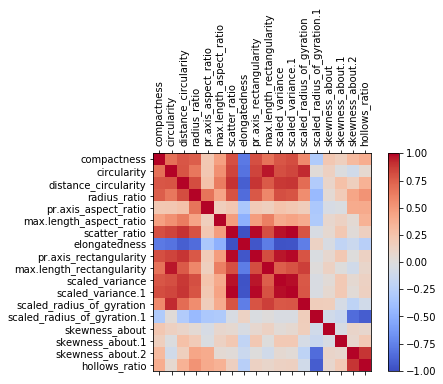

In [25]:
# plot of correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_vehicles_final.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_vehicles_final.columns)
ax.set_yticklabels(df_vehicles_final.columns)
plt.show();

    1) Columns denoting skewness are weekly related with each other
    2) Scaled_radius_of_gyration and scaled_radius_of_gyration.1 are weekly correlated with each other
    3) Scaled_variance and Scaled_variance.1 are highly correlated with each other
    4) Scatter_ratio is positively correlated with pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1 columns
    5) Scatter_ratio is negatively correlated with elongatedness
    
We can drop one of the column from the pairs that have very high correlation ( > 0.95) as there is no big information gain in having both the columns

In [26]:
# Let us find out columns that have correlation more than 0.95
to_drop = [column for column in ut.abs().columns if any(ut.abs()[column] > 0.95)]

In [27]:
to_drop

['elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1']

In [28]:
df_vehicles_final = df_vehicles_final.drop(df_vehicles_final[to_drop],axis=1)
df_vehicles_final.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio'],
      dtype='object')

In [29]:
df_vehicles_finalz = df_vehicles_final.apply(zscore)
new_corr = df_vehicles_finalz.corr()

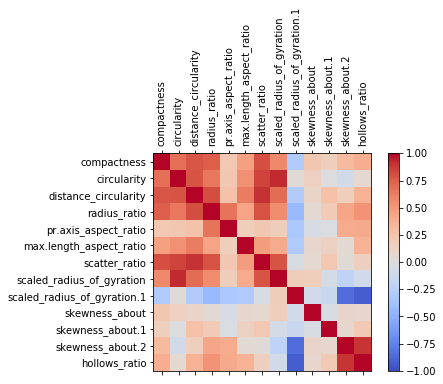

In [30]:
# plot of correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(new_corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_vehicles_final.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_vehicles_final.columns)
ax.set_yticklabels(df_vehicles_final.columns)
plt.show();

In [31]:
df_vehicles_final.shape

(824, 13)

Dataframe looks far more less correlated now

In [32]:
# PCA
# Lets do a Z score transformation of the dataframe
df_vehicles_finalz = df_vehicles_final.apply(zscore)
df_vehicles_finalz.head(3)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.179512,0.532535,0.070311,0.324143,1.917991,0.828137,-0.196957,0.309518,-0.326781,-0.056763,0.394835,-0.319884,0.180699
1,-0.315197,-0.616179,0.134048,-0.836998,-0.746843,0.377420,-0.597300,-0.504715,-0.008498,0.569655,0.167877,0.006536,0.452406
2,1.292608,0.860738,1.536252,1.296990,0.852057,0.828137,1.188844,1.436917,0.150644,1.613685,-0.399518,-0.156674,0.044845


In [33]:
# Create a covariance matrix
cov_mat = np.cov(df_vehicles_finalz.T)

In [34]:
# Identify eigen values and eigen vectors
eigen_val,eigen_vec = np.linalg.eig(cov_mat)

In [35]:
# eigen value
print('Eigen value')
eigen_val
# eigen vector
print('Eigen vector')
eigen_vec

Eigen value


array([ 5.66440903,  3.00264818,  1.13833177,  1.10310878,  0.77448849,
        0.61012742,  0.28872845,  0.17504768,  0.09207445,  0.02170523,
        0.05605384,  0.05023953,  0.038833  ])

Eigen vector


array([[-0.36143043,  0.03516051, -0.05562689,  0.14983034,  0.10056906,
        -0.348228  , -0.58452256, -0.43699812,  0.38871209,  0.03263442,
         0.13571597,  0.08853809,  0.01255148],
       [-0.34050556,  0.28297946,  0.1167767 ,  0.03431845, -0.09564807,
        -0.03035253,  0.36742437, -0.27111549,  0.0964319 , -0.13586156,
        -0.03987851, -0.68404187, -0.27079304],
       [-0.38996709,  0.09879818, -0.15700516, -0.01362714, -0.04676679,
        -0.05578846, -0.01076625,  0.53845593, -0.07053184, -0.0202869 ,
         0.65698058,  0.06296094, -0.27749634],
       [-0.38684815, -0.06909633,  0.12651907, -0.20455115,  0.21507569,
         0.03585955, -0.14623898,  0.26540071, -0.02839627, -0.69320905,
        -0.39099597,  0.08249252,  0.08562201],
       [-0.19335701, -0.19032077,  0.459384  , -0.41302867,  0.28701151,
         0.54007631, -0.10488839, -0.10767464,  0.11640866,  0.31660445,
         0.17474872, -0.04106614, -0.04580833],
       [-0.26955485,  0.032391

In [36]:
# Variance and Cumulative Variance from Eigen Values
# Variance
tot = sum(eigen_val)
eigvariance = [(i/tot) for i in sorted(eigen_val,reverse=True)]
eigvariance

[0.43519498079196417,
 0.23069262988943104,
 0.087457715476640926,
 0.084751542913929279,
 0.059503736736869373,
 0.046875921045958731,
 0.022182927057266179,
 0.013448865232844944,
 0.0070740548364621606,
 0.0043066013049704761,
 0.0038598893946621324,
 0.0029835286749197729,
 0.0016676066440806591]

In [37]:
# Cumulative Variance
eigcumvariance = np.round(np.cumsum(eigvariance),decimals=3)*100
eigcumvariance

array([  43.5,   66.6,   75.3,   83.8,   89.8,   94.4,   96.7,   98. ,
         98.7,   99.1,   99.5,   99.8,  100. ])

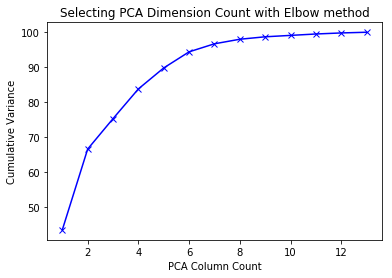

In [38]:
plt.plot(range(1,len(eigcumvariance)+1),eigcumvariance,'bx-')
plt.xlabel('PCA Column Count')
plt.ylabel('Cumulative Variance')
plt.title('Selecting PCA Dimension Count with Elbow method');

In [39]:
print('Independent variable dataframe')
df_vehicles_finalz.shape
print('Dependent dataframe')
df_vehicleclass.shape

Independent variable dataframe


(824, 13)

Dependent dataframe


(824,)

From the cumulative variance values and elbow plot it is clear that we can select dimension count as 7 (which captures 96.4 % of information (more than 95%))

In [40]:
# Split data to train and test
X_train,X_test,y_train,y_test = train_test_split(df_vehicles_finalz,df_vehicleclass,test_size=0.2,random_state=100)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(659, 13)

(165, 13)

(659,)

(165,)

In [41]:
# Support vector machine
#C value of 0 or less than 0 throws value error
c_range = [0.05,0.5,1]

for x in c_range:
    svc = svm.SVC(C=x,kernel='linear').fit(df_vehicles_finalz,df_vehicleclass)
    svc.fit(X_train,y_train)
    pred = svc.predict(X_test)
    print('C:',x,' and kernel: linear')
    print('Train Score:',svc.score(X_train,y_train))
    print('Test Score:',svc.score(X_test,y_test))
    
for x in c_range:
    svc = svm.SVC(C=x,kernel='rbf').fit(df_vehicles_finalz,df_vehicleclass)
    svc.fit(X_train,y_train)
    pred = svc.predict(X_test)
    print('C:',x,' and kernel: rbf')
    print('Train Score:',svc.score(X_train,y_train))
    print('Test Score:',svc.score(X_test,y_test))


SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C: 0.05  and kernel: linear
Train Score: 0.901365705615
Test Score: 0.939393939394


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C: 0.5  and kernel: linear
Train Score: 0.942336874052
Test Score: 0.933333333333


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C: 1  and kernel: linear
Train Score: 0.943854324734
Test Score: 0.945454545455


F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C: 0.05  and kernel: rbf
Train Score: 0.728376327769
Test Score: 0.70303030303


F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C: 0.5  and kernel: rbf
Train Score: 0.955993930197
Test Score: 0.981818181818


F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C: 1  and kernel: rbf
Train Score: 0.972685887709
Test Score: 0.987878787879


C value of 1 and rbf kernel as hyperparameters give a overall test score of 98.78% and train score of 97.26%